In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer   #imputation missing data 
#----------------------------------------
#--------Store data as dataframe----------
#----------------------------------------
dataset=pd.read_csv("Wuzzuf_Jobs.csv")
dataset=pd.DataFrame(dataset)
s=dataset.describe()

In [2]:
#----------------------------------------
#--------Cleaning data-----------
#----------------------------------------
dataset.sort_values("Title", inplace = True)
dataset.drop_duplicates(keep = "first", inplace = True)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 7].values

imputer = SimpleImputer(missing_values = "", strategy = 'most_frequent')
imputer = imputer.fit(X[:, 0:7])
X[:, 0:7] = imputer.transform(X[:, 0:7])

>>>>>>>>>>popular Company >>>>>>>>>>>
Confidential    590
Mishkat Nour     39
Expand Cart      35
EGIC             34
Aqarmap.com      25
Name: Company, dtype: int64


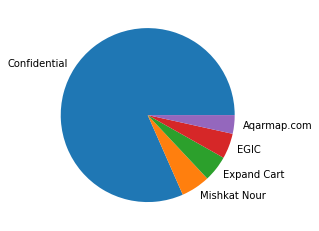

In [3]:
#----------------------------------------
#--------Showing Company ----------------
#----------------------------------------
print(">>>>>>>>>>popular Company >>>>>>>>>>>")
numOfjops=dataset['Company'].value_counts().head()
print(numOfjops)
labels=list(numOfjops.keys())
plt.pie(numOfjops,labels = labels)
plt.show()

>>>>>>>>>>popular jops >>>>>>>>>>>
Accountant                      57
Sales Representative            47
Graphic Designer                43
Digital Marketing Specialist    26
Sales Manager                   25
Name: Title, dtype: int64


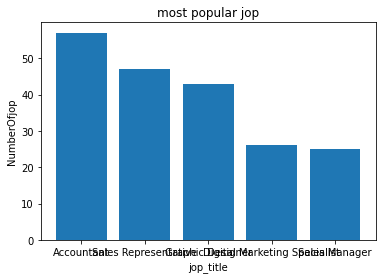

In [4]:
#----------------------------------------
#--------most popular jops -----------
#----------------------------------------
print(">>>>>>>>>>popular jops >>>>>>>>>>>")
jops=dataset['Title'].value_counts().head()
print(jops)
plt.xlabel("jop_title")
plt.ylabel("NumberOfjop")
plt.title("most popular jop")
jopLabels=jops.keys()
#jopLabels=["Accountant","Sales","GraphicDesigner","Digital M","Sales Manager"]
plt.bar(jopLabels,jops)
plt.show()

 Cairo             563
 Maadi             524
 New Cairo         520
 Nasr City         424
 6th of October    282
Name: Location, dtype: int64


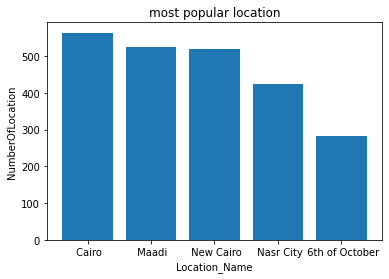

In [5]:
#----------------------------------------
#--------most popular areas -----------
#----------------------------------------
areas=dataset['Location'].value_counts().head()
print(areas)
plt.xlabel("Location_Name")
plt.ylabel("NumberOfLocation")
plt.title("most popular location")
locLable=list(areas.keys())
plt.bar(locLable,areas)
plt.show()

>>>>>>>>>>popular skills >>>>>>>>>>>
Corporate Sales, Real Estate, Advertising, Marketing, Sales Skills, Insurance, Sales Target, Outdoor Sales, Telesales, Property       12
Logistics, SAP, Inventory, Store Keeping, Logistics/Supply Chain                                                                      11
Sales Skills, Sales Target, Customer Services, Customer Care, Retail, Collection, Distribution, Selling Skills, Negotiation Skills    10
Real Estate, Sales Skills, Sales Target, Outdoor Sales, Property, Customer Service, Customer Care, Customer Support, Advertising       9
Finance, Sales Accounting, Commerce, Budget, Reporting, Accounting/Finance                                                             9
Name: Skills, dtype: int64


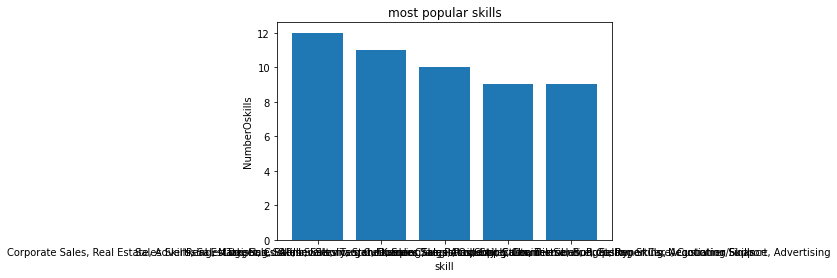

In [6]:
#----------------------------------------
#--------most popular areas -----------
#----------------------------------------
skills=dataset['Skills'].value_counts().head()
print(">>>>>>>>>>popular skills >>>>>>>>>>>")
print(skills)
skillsLabel=list(skills.keys())
plt.xlabel("skill")
plt.ylabel("NumberOskills")
plt.title("most popular skills")
plt.bar(skillsLabel,skills)
plt.show()

In [7]:
dataset["Skills"] = dataset["Skills"].str.split(",")
dataset.head()

,Title,Company,Location,Type,Level,YearsExp,Country,Skills
3410,.NET Angular Software Developer,Xceed,Maadi,Full Time,Experienced,5+ Yrs of Exp,Cairo,"[Software Development, Computer Science, Sof..."
2859,.NET Back-End Web Developer,Confidential,Cairo,Full Time,Experienced,2-5 Yrs of Exp,Egypt,"[Computer Science, Software Development, jav..."
1717,.NET Developer,Beta Electronics,Dokki,Full Time,Experienced,2-5 Yrs of Exp,Giza,"[C#, Engineering, Computer Science, Program..."
3074,.NET Developer,Dynamicslink,Nasr City,Full Time,Experienced,3-5 Yrs of Exp,Cairo,"[Microsoft Dynamics, ERP, Computer Science, ..."
2862,.NET Developer (Desktop Application),Confidential,Manial,Full Time,Experienced,2-5 Yrs of Exp,Cairo,"[Information Technology (IT), .NET, C#, Sof..."


In [8]:
skills = pd.DataFrame(dataset['Skills'].tolist()).fillna('').add_prefix('Skill_')

In [9]:
dataset.columns=["Title","Company","Location","Type	","Type","YearsExp","Country","Skills"]
dataset = pd.concat([dataset,skills], axis=1)
dataset.head()

,Title,Company,Location,Type\t,Type,YearsExp,Country,Skills,Skill_0,Skill_1,...,Skill_7,Skill_8,Skill_9,Skill_10,Skill_11,Skill_12,Skill_13,Skill_14,Skill_15,Skill_16
0,Customer Service Agent,Johnson Controls,New Cairo,Full Time,Entry Level,1-3 Yrs of Exp,Cairo,"[Call Center, Customer Support, Customer Car...",Software Development,Computer Science,...,XAML,RAzor,,,,,,,,
1,Marketing Manager,SYE English Community,Dokki,Full Time,Manager,5-10 Yrs of Exp,Giza,"[Market Research, Social Media, Online Marke...",Computer Science,Software Development,...,OOP,JSON,XML,Back End,,,,,,
2,Medical Representative Heliopolis,So Value Pharma,Cairo,Full Time,Entry Level,0-5 Yrs of Exp,Egypt,"[Cardio-metabolic, Sales Skills, Sales Targe...",C#,Engineering,...,Problem Solving,Information Technology (IT),,,,,,,,
3,Order Handling Specialist,Johnson Controls,New Cairo,Full Time,Experienced,3-5 Yrs of Exp,Cairo,"[Supply Officer, Supply Planner, Procurement...",Microsoft Dynamics,ERP,...,C/AL,C/Side,,,,,,,,
4,Storekeeper,Confidential,Cairo,Full Time,Experienced,3+ Yrs of Exp,Egypt,"[Warehousing, Storekeeping, Logistics/Supply...",Information Technology (IT),.NET,...,Design Patterns,LINQ,FTP,,,,,,,
